# Импорт Библиотек

In [230]:
import pandas as pd
import numpy as np
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn. linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from warnings import simplefilter
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score

from numpy import nan

In [231]:
import shap 

# Загрузка данных

In [232]:
#data = pd.read_excel(r"C:\Users\shurf\Downloads\Telegram Desktop\ML_model 19.02.24.xlsx")
#data = pd.read_excel(r"E:\Рак поджелудочной железы\ВКР\Набор материалла\Объединение датасетов\Data 02.24\ML_model 19.02.24.xlsx")
#x = "E:/Рак поджелудочной железы/ВКР/Набор материалла/Объединение датасетов/Data 02.24/"
x = "/home/genetics/ML/"
data = pd.read_excel("/home/genetics/ML/ML_model 19.02.24.xlsx")

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 31 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Возраст                                                          140 non-null    float64
 1   Пол                                                              140 non-null    float64
 2   Резекция сосудов                                                 140 non-null    float64
 3   Размер  Вирсунгова протока КТ, мм                                141 non-null    float64
 4   Анастомоз по Блюмгарту                                           140 non-null    float64
 5   Анастомоз по РУ                                                  140 non-null    float64
 6   Время операции, мин                                              139 non-null    float64
 7   Объем кровопотери, мл                       

In [234]:
data = data.rename(columns = {'Гистотип: аденокарцинома -2, нейроэндоксринная -1, доброкач - 0' : 'Морфологический тип опухоли', 'Амилаза крови 1-15 п/о дни': 'Амилаза крови 10-15 п/о дни'})

# Удаление пропусков

In [235]:
# Числовые
data['Возраст'].fillna(data['Возраст'].mean(), inplace=True)
data['Время операции, мин'].fillna(data['Время операции, мин'].mean(), inplace=True)
data['Объем кровопотери, мл'].fillna(data['Объем кровопотери, мл'].mean(), inplace=True)
data['Продолжительность дренирования, сут'].fillna(data['Продолжительность дренирования, сут'].mean(), inplace=True)
data['ИМТ'].fillna(data['ИМТ'].mean(), inplace=True)
data['Размеры опухоли, см3'].fillna(data['Размеры опухоли, см3'].mean(), inplace=True)
data['Амилаза дренажа 1-5 п/о дни'].fillna(data['Амилаза дренажа 1-5 п/о дни'].mean(), inplace=True)
data['Амилаза дренажа 10-15 п/о дни'].fillna(data['Амилаза дренажа 10-15 п/о дни'].mean(), inplace=True)
data['Лейкоциты, ОАК 5-7 п/о дни'].fillna(data['Лейкоциты, ОАК 5-7 п/о дни'].mean(), inplace=True)
data['Лейкоциты, ОАК 10-15 п/о дни'].fillna(data['Лейкоциты, ОАК 10-15 п/о дни'].mean(), inplace=True)

# Категориальные
data['Пол'].fillna(data['Пол'].mode()[0], inplace=True)
data['Резекция сосудов'].fillna(data['Резекция сосудов'].mode()[0], inplace=True)
data['Размер  Вирсунгова протока КТ, мм'].fillna(data['Размер  Вирсунгова протока КТ, мм'].mode()[0], inplace=True)
data['Анастомоз по Блюмгарту '].fillna(data['Анастомоз по Блюмгарту '].mode()[0], inplace=True)
data['Анастомоз по РУ'].fillna(data['Анастомоз по РУ'].mode()[0], inplace=True)
data['Пункционная энтеростома'].fillna(data['Пункционная энтеростома'].mode()[0], inplace=True)
data['НАПХТ'].fillna(data['НАПХТ'].mode()[0], inplace=True)
data['Морфологический тип опухоли'].fillna(data['Морфологический тип опухоли'].mode()[0], inplace=True)
data['G'].fillna(data['G'].mode()[0], inplace=True)
data['R-cтатус '].fillna(data['R-cтатус '].mode()[0], inplace=True)
data['Стадия'].fillna(data['Стадия'].mode()[0], inplace=True)
data['Периневральная инвазия'].fillna(data['Периневральная инвазия'].mode()[0], inplace=True)
data['Васкулярная инвазия'].fillna(data['Васкулярная инвазия'].mode()[0], inplace=True)
data['Послеоперационная смерть'].fillna(data['Послеоперационная смерть'].mode()[0], inplace=True)

In [236]:
data.loc[(data['Лейкоциты, ОАК 1-5 п/о дни'] == ' 8,9 _x000D_\n'), ['Лейкоциты, ОАК 1-5 п/о дни']] = None
data['Лейкоциты, ОАК 1-5 п/о дни'].astype('float')
data['Лейкоциты, ОАК 1-5 п/о дни'].fillna(data['Лейкоциты, ОАК 1-5 п/о дни'].mean(), inplace=True)

In [237]:
data.loc[(data['Лейкоциты, ОАК 1-3 п/о дни'] == ' 8,9 _x000D_\n'), ['Лейкоциты, ОАК 1-3 п/о дни']] = None
data['Лейкоциты, ОАК 1-3 п/о дни'].astype('float')
data['Лейкоциты, ОАК 1-3 п/о дни'].fillna(data['Лейкоциты, ОАК 1-3 п/о дни'].mean(), inplace=True)

In [238]:
data['Амилаза крови 1-5 п/о дни'].fillna(data.query('`Амилаза крови 1-5 п/о дни`  < 120')['Амилаза крови 1-5 п/о дни'].mean(), inplace=True)
data['Амилаза крови 10-15 п/о дни'].fillna(data.query('`Амилаза крови 10-15 п/о дни`  < 120')['Амилаза крови 10-15 п/о дни'].mean(), inplace=True)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Возраст                              142 non-null    float64
 1   Пол                                  142 non-null    float64
 2   Резекция сосудов                     142 non-null    float64
 3   Размер  Вирсунгова протока КТ, мм    142 non-null    float64
 4   Анастомоз по Блюмгарту               142 non-null    float64
 5   Анастомоз по РУ                      142 non-null    float64
 6   Время операции, мин                  142 non-null    float64
 7   Объем кровопотери, мл                142 non-null    float64
 8   Продолжительность дренирования, сут  142 non-null    float64
 9   Пункционная энтеростома              142 non-null    float64
 10  ИМТ                                  142 non-null    float64
 11  НАПХТ                           

In [240]:
data = data.drop(['R-cтатус ' , 
           'Продолжительность дренирования, сут', 'Послеоперационная смерть', 'Лейкоциты, ОАК 1-3 п/о дни'], axis = 1)

# Корреляция кендала

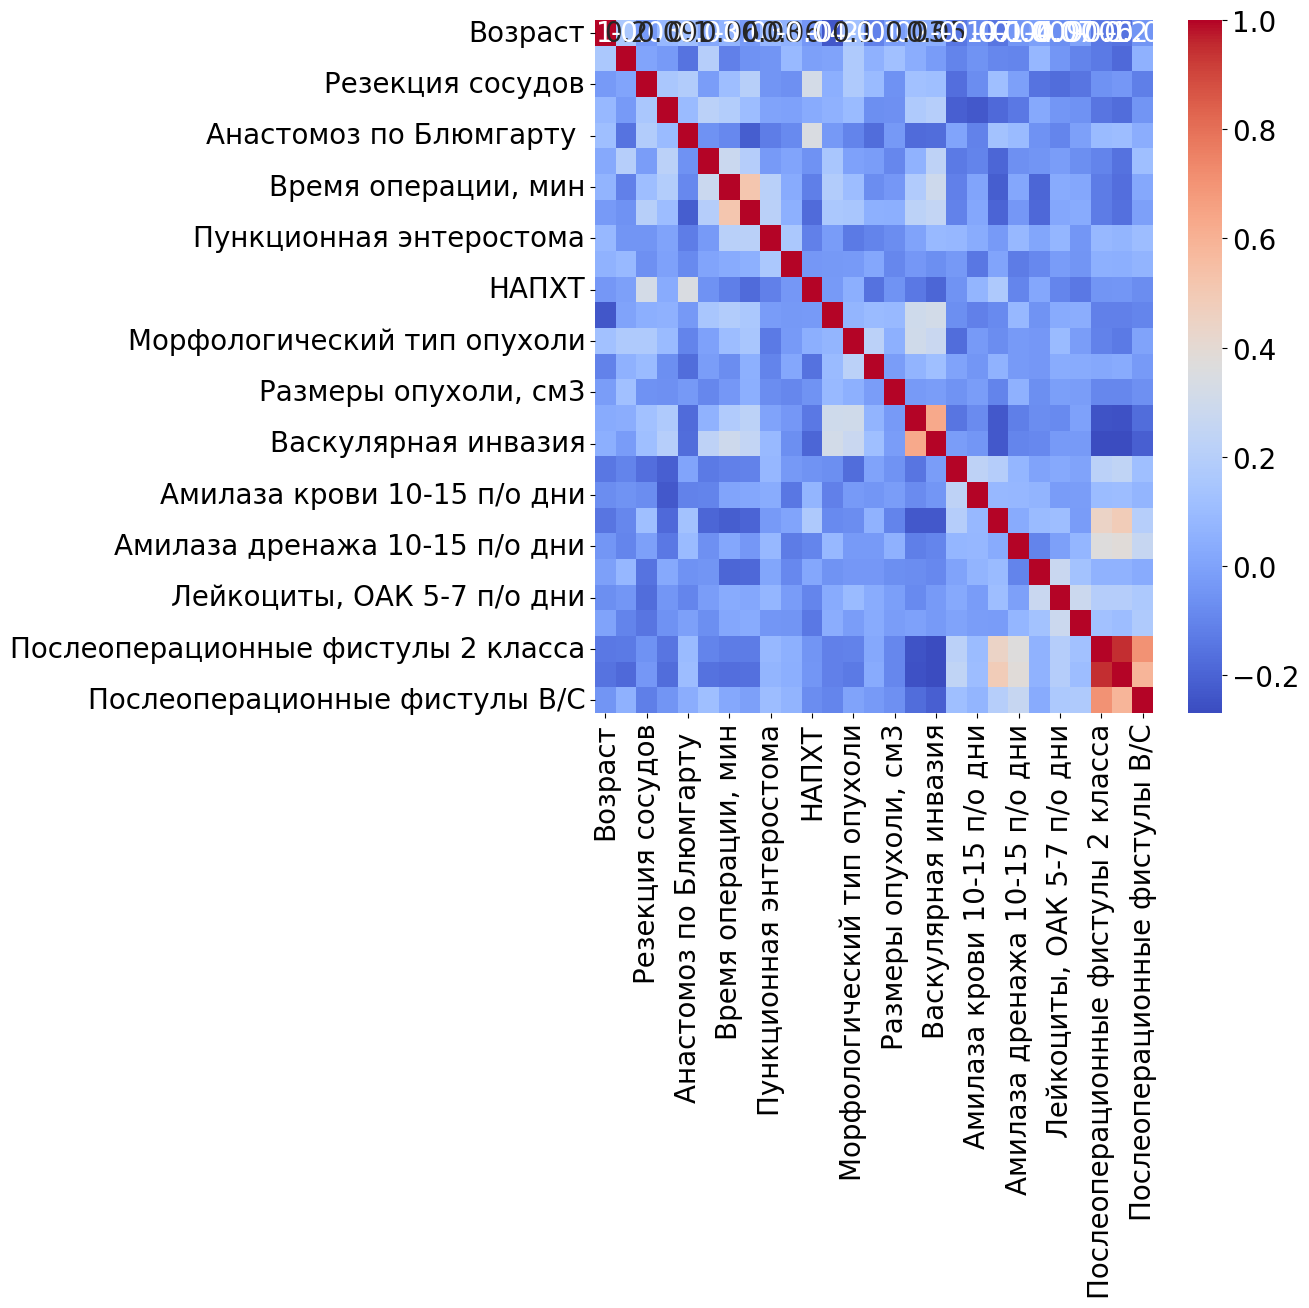

In [241]:
fig, ax = plt.subplots(figsize=(9, 9))
seaborn.heatmap(data.corr(method='kendall'), annot = True, fmt='.1g', cmap= 'coolwarm')
None

# Подготовка данных

In [242]:
num_columns = ['Возраст',
              'Время операции, мин',
              'Объем кровопотери, мл',
              #'Продолжительность дренирования, сут',
              'ИМТ',
              'Размеры опухоли, см3',
              'Амилаза крови 1-5 п/о дни',
              'Амилаза крови 10-15 п/о дни',
              'Амилаза дренажа 1-5 п/о дни',
              'Амилаза дренажа 10-15 п/о дни' ,
              # 'Лейкоциты, ОАК 1-3 п/о дни' ,
              'Лейкоциты, ОАК 1-5 п/о дни' ,
              'Лейкоциты, ОАК 5-7 п/о дни',
              'Лейкоциты, ОАК 10-15 п/о дни'
              ]
cat_columns = ['Пол',
              'Резекция сосудов',
              'Размер  Вирсунгова протока КТ, мм',
              'Анастомоз по Блюмгарту ',
              'Анастомоз по РУ',
              'Пункционная энтеростома',
               'НАПХТ',
               'Стадия',
               'Морфологический тип опухоли',
               'G',
               #'R-cтатус ',
               'Периневральная инвазия',
               'Васкулярная инвазия',
               #'Послеоперационная смерть'
              ]

# Пайплайн

In [243]:
X = data.drop(['Послеоперационные фистулы 2 класса', 'Послеоперационные фистулы В/С', 'Послеоперационные фистулы бх+В/С'], axis=1)
y = data['Послеоперационные фистулы бх+В/С']

columns_names = cat_columns + num_columns

In [244]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Послеоперационные фистулы 2 класса', 'Послеоперационные фистулы В/С', 'Послеоперационные фистулы бх+В/С'], axis=1),
    data['Послеоперационные фистулы бх+В/С'],
    test_size = 0.25, 
    random_state = 42,
    stratify = data['Послеоперационные фистулы бх+В/С'])

In [245]:
encoder = LabelEncoder()
y_train_trans = encoder.fit_transform(y_train)
y_test_trans = encoder.transform(y_test)

In [246]:
data_preprocessor = ColumnTransformer(
    [
        ('cat', StandardScaler(), cat_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [247]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=42))
    ]
) 

In [248]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
  {
    'models': [DecisionTreeClassifier(random_state=42)],
    'models__max_depth': [None, 1, 3, 5, 10, 20, 30],
    'models__max_features': range(1, 28)
},
    
   # словарь для модели KNeighborsClassifier() 
    {
       'models': [KNeighborsClassifier()],
       'models__n_neighbors': range(2, 5) 
   },
    
       # словарь для модели RandomForestClassifier() 
    {
       'models': [RandomForestClassifier(random_state=42)],
        'models__n_estimators': [50, 100, 200, 150, 500, 1000],
        'models__max_depth': [None, 1, 3, 5, 10, 20, 30],
        'models__min_samples_leaf': [1, 2, 4, 6, 8],
        'models__max_features': range(1, 28)
   },
    
           # словарь для модели CatBoostClassifier() 
    {
       'models': [CatBoostClassifier()],
        'models__depth': [4,5,6,7,8,9, 10],
        'models__learning_rate' : [0.01,0.02,0.03,0.04, 0.001, 0.0001, 0.1],
        'models__iterations'    : [10, 20,30,40,50,60,70,80,90, 100, 500]
   },
    
    # словарь для модели SVC()
    
        {
        'models': [SVC(probability=True, random_state=42)],
        'models__C':[0.1,1,10,50,100],
        'models__kernel':['rbf','poly','sigmoid','linear'],
        'models__degree':[1,2,3,4,5,6],
         'models__gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=42, 
            solver='liblinear', 
        )],
        'models__C': range(1, 10),
        'models__penalty': ['l1','l2'],
        'models__max_features': range(1, 28)
    },
    
        # словарь для модели Ridge()
    {
        'models': [Ridge()],
        "models__alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20],
        'models__max_features': range(1, 28)
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=43,
    n_jobs=-1
)
randomized_search.fit(X, y)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', StandardScaler(),
                                                  ['Пол', 'Резекция сосудов',
                                                   'Размер  Вирсунгова протока '
                                                   'КТ, мм',
                                                   'Анастомоз по Блюмгарту ',
                                                   'Анастомоз по РУ',
                                                   'Пункционная энтеростома',
                                                   'НАПХТ', 'Стадия',
                                                   'Морфологический тип '
                                                   'опухоли',
                                                   'G',
                                                   'Периневральная инвазия',
               

In [249]:
print('Метрика лучшей модели на тестовой выборке:', roc_auc_score(randomized_search.best_estimator_.predict(X_test), y_test_trans))

Метрика лучшей модели на тестовой выборке: 0.9615384615384616


### Лучшая модель

In [250]:
X_train_get = pd.DataFrame(data_preprocessor.fit_transform(X_train))
X_test_get = pd.DataFrame(data_preprocessor.transform(X_test))

In [251]:
best_model = RandomForestClassifier(max_depth=3, max_features=9,
                                        min_samples_leaf=4, n_estimators=50,
                                        random_state=42)
best_model.fit(X_train_get, y_train_trans)

RandomForestClassifier(max_depth=3, max_features=9, min_samples_leaf=4,
                       n_estimators=50, random_state=42)

In [252]:
X_train_get.columns = [columns_names]
X_test_get.columns = [columns_names]

### Импортанс

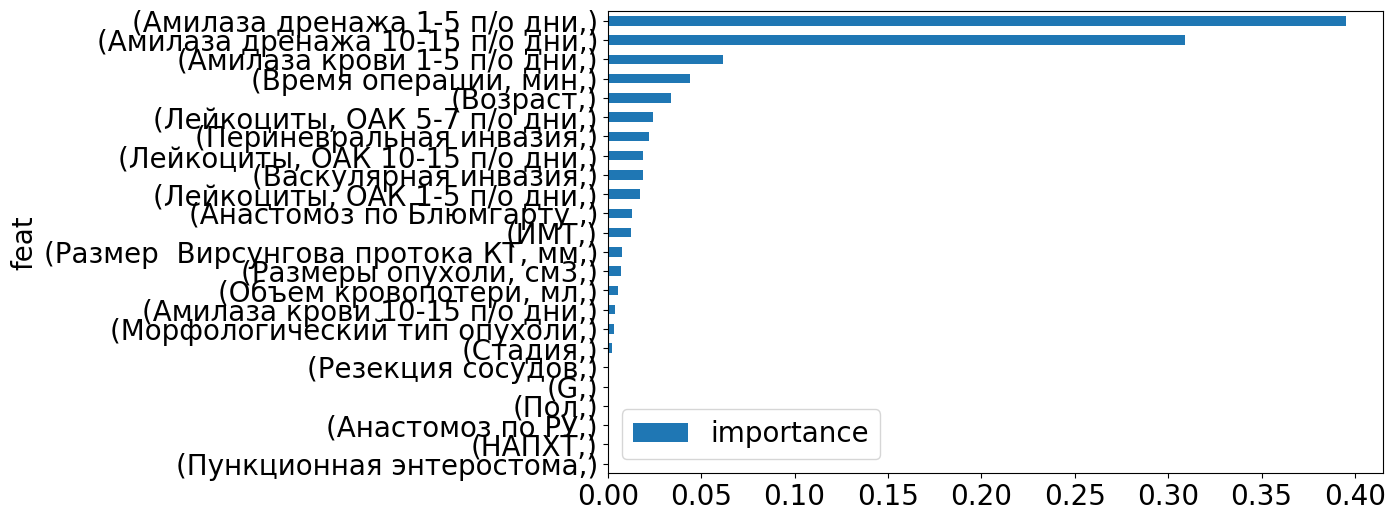

In [253]:
imp =  pd.DataFrame(list(zip(best_model.feature_importances_, X_train_get.columns)))
imp.columns = ['importance', 'feat']

imp.sort_values('importance', ascending = True).plot(x='feat', y='importance', kind='barh', figsize=(10, 6))
None

### Shap

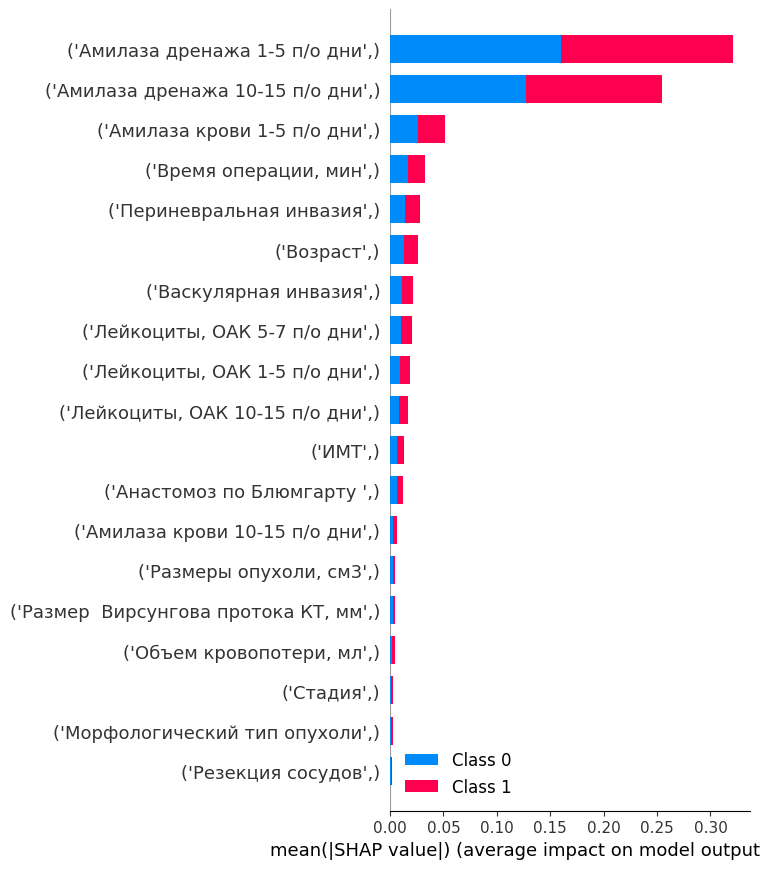

In [254]:
shap_test = shap.TreeExplainer(best_model).shap_values(X_train_get)
shap.summary_plot(shap_test, X_train_get,
                      max_display=19)

# Сбор метрик У = Послеоперационные фистулы бх+В/С

In [255]:
def roc_multi(y_test, y_score):

    n_classes = y_score.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test==i, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    return roc_auc, fpr, tpr

In [256]:
ds =[]

## X = Все данные, У = Послеоперационные фистулы бх+В/С

### Random forest

In [189]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 40)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
#grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)



Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 300}
Best Cross-Validation Score: 0.9660818713450292
roc_auc по Шурику: 0.9667119565217391
roc_auc средний: 0.9567251461988302


In [ ]:
plt.rcParams['font.size'] = 12
#plt.rcParams['font.family'] = 'Arial'

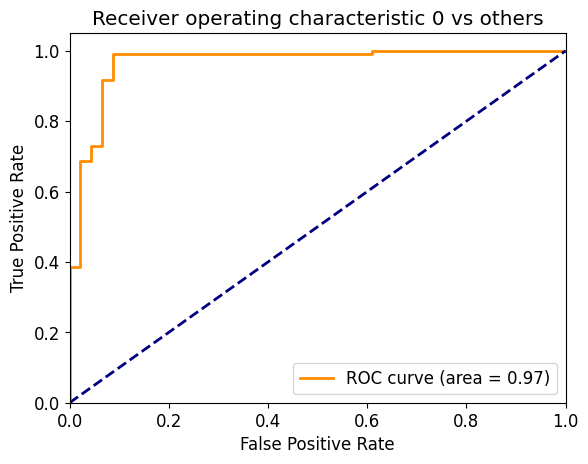

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.savefig(x+"ROC_Все бх+ВС.png")
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


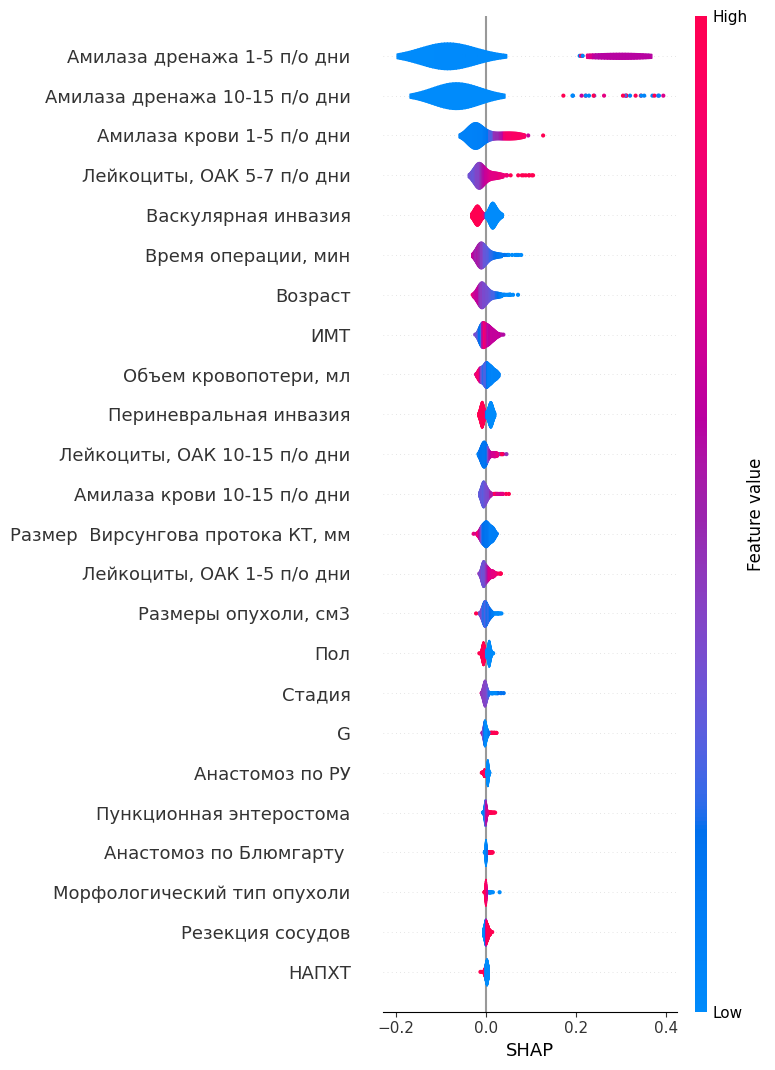

In [ ]:
plt.rcParams.update({'font.size': 20})
#plt.rcParams["font.family"] = "Times New Roman"

calc_model = grid_search.best_estimator_.fit(X, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)

with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
    imp_out.to_excel(writer, sheet_name='Все бх+ВС4', index=False)
#imp_out.to_excel(x+"Importances.xlsx", sheet_name="Все бх+ВС")


#fig, ax = plt.subplots()
shap_test = shap.TreeExplainer(calc_model).shap_values(X)
shap.plots.violin(shap_test[1], X,
                     max_display=100, 
                        show=False #, plot_size=(20, 20)
                 )
plt.xlabel('SHAP')

#ax.set_xlabel('SHAP', fontsize=14)
#ax.set_ylabel("Y", fontsize=16)

plt.tight_layout()
plt.savefig(x+"SHAP_Все бх+ВС.png")

## X = данные за 1-5 дни, У = Послеоперационные фистулы бх+В/С

In [ ]:
num_columns_begin = ['Возраст',
              'Время операции, мин',
              'Объем кровопотери, мл',
             # 'Продолжительность дренирования, сут',
              'ИМТ',
              'Размеры опухоли, см3',
              'Амилаза крови 1-5 п/о дни',
              'Амилаза дренажа 1-5 п/о дни',
              'Лейкоциты, ОАК 1-5 п/о дни' ,
              ]



In [ ]:
data_preprocessor_begin = ColumnTransformer(
    [
        ('cat', StandardScaler(), cat_columns),
        ('num', StandardScaler(), num_columns_begin)
    ], 
    remainder='passthrough'
) 

pipe_final_begin = Pipeline(
    [
        ('preprocessor', data_preprocessor_begin),
        ('models', DecisionTreeClassifier(random_state=42))
    ]
) 

In [ ]:
X_begin = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 10-15 п/о дни',
                    'Амилаза дренажа 10-15 п/о дни',
                    #'Лейкоциты, ОАК 1-3 п/о дни',
                    'Лейкоциты, ОАК 5-7 п/о дни',
                    'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_begin

y = data['Послеоперационные фистулы бх+В/С']

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 40)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
  #  random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)

Best Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 17, 'n_estimators': 300}
Best Cross-Validation Score: 0.8301754385964912
roc_auc по Шурику: 0.8509963768115942
roc_auc средний: 0.8509356725146201


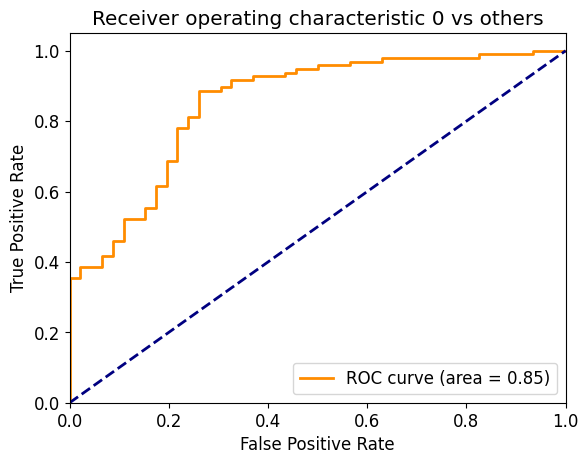

In [ ]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.savefig(x+"ROC_1-5 бх+ВС.png")
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


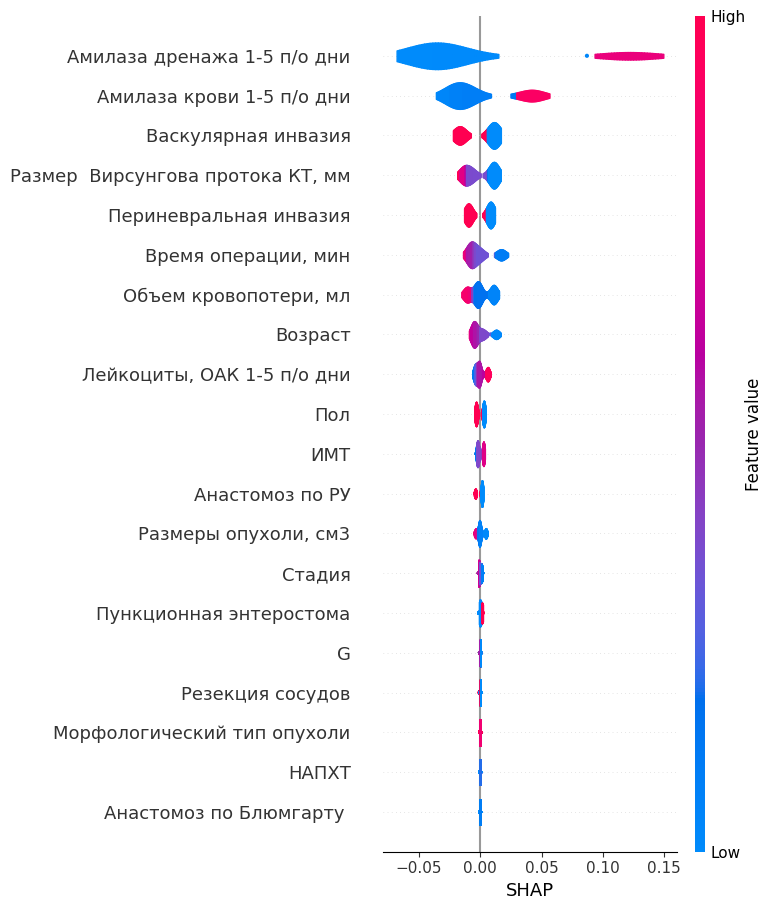

In [ ]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X_begin, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X_begin.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)

with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
    imp_out.to_excel(writer, sheet_name='1-5 бх+ВС', index=False)
#imp_out.to_excel(x+"Importances.xlsx", sheet_name="Все бх+ВС")


#fig, ax = plt.subplots(figsize=(20, 20))
shap_test = shap.TreeExplainer(calc_model).shap_values(X_begin)
fig = shap.plots.violin(shap_test[1], X_begin,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_1-5 бх+ВС.png")

## X = Все данные кроме хронологических

In [257]:
num_columns_zero = ['Возраст',
              'Время операции, мин',
              'Объем кровопотери, мл',
              #'Продолжительность дренирования, сут',
              'ИМТ',
              'Размеры опухоли, см3']

data_preprocessor_zero = ColumnTransformer(
    [
        ('cat', StandardScaler(), cat_columns),
        ('num', StandardScaler(), num_columns_zero)
    ], 
    remainder='passthrough'
) 

pipe_final_zero = Pipeline(
    [
        ('preprocessor', data_preprocessor_zero),
        ('models', DecisionTreeClassifier(random_state=42))
    ]
) 

X_zero = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 1-5 п/о дни', 'Амилаза крови 10-15 п/о дни',
       'Амилаза дренажа 1-5 п/о дни', 'Амилаза дренажа 10-15 п/о дни',
      # 'Лейкоциты, ОАК 1-3 п/о дни', 
                    'Лейкоциты, ОАК 1-5 п/о дни',
       'Лейкоциты, ОАК 5-7 п/о дни', 'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_zero

y = data['Послеоперационные фистулы бх+В/С']



In [324]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga', 'newton-cg', 'lbfgs'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }


clf_model = LogisticRegression()
grid_search = GridSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
#grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
#ds.append(rf_all)
#metrics = pd.DataFrame(ds)
#metrics.to_excel(x+"model_metrics.xlsx")

/home/genetics/Programms/anaconda3/envs/ML_pipe/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/genetics/Programms/anaconda3/envs/ML_pipe/lib/python3.10/site-packages/sklearn/utils/optimize.py:44: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/genetics/Programms/anaconda3/envs/ML_pipe/lib/python3.10/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/genetics/Programms/anaconda3/envs/ML_pipe/lib/python3.10/site-packages/sklearn/utils/optimize.py:44: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/genetics/Programms/anaconda3/envs/ML_pipe/lib/python3.10/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search fa

Best Hyperparameters: {'C': 0.002335721469090121, 'max_iter': 10000, 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.6552046783625732
roc_auc по Шурику: 0.6847826086956521
roc_auc средний: 0.7069590643274853


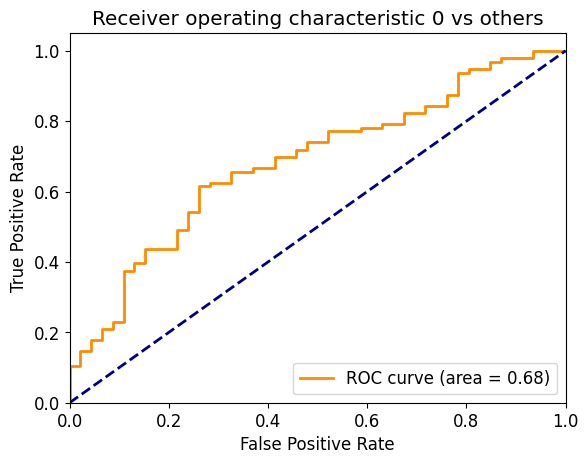

In [272]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.savefig(x+"Logreg_ROC_init бх+ВС.png")
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

In [275]:
len(y)

142

In [325]:
grid_search.best_estimator_.fit(X_zero, y).coef_

array([[-3.67238451e-02, -1.18145644e-02,  1.77627642e-04,
        -5.02276680e-02,  5.07925631e-03, -6.11244910e-03,
        -2.64100180e-03, -3.70686529e-04,  7.96430989e-03,
         8.49991208e-05, -3.78117568e-03, -9.83867006e-03,
        -3.98104605e-03,  2.12431360e-03, -1.11943198e-02,
        -1.36902583e-02, -1.32700943e-02]])

In [299]:
imp = pd.DataFrame({'coef': grid_search.best_estimator_.fit(X_zero, y).coef_[0], 'feat': X_zero.columns}, columns=['coef', 'feat'])
imp = imp.sort_values('coef', ascending = False)
imp.to_excel(x+"LogReg_b-model_skfeat.xlsx")

In [301]:
imp.to_excel(x+"LogReg_b-model_skfeat.xlsx")

In [303]:
f = list(grid_search.best_estimator_.fit(X_zero, y).intercept_) + ["intercept"]
imp2 = imp
imp2.loc[len(imp2)] = f
imp2.to_excel(x+"LogReg_b-model2_skfeat.xlsx")

In [313]:
from sklearn.metrics import r2_score
y_pred=grid_search.best_estimator_.predict(X_zero, y)
r2_score(y, y_pred, force_finite=True)

-0.4470108695652173

In [317]:
model_log = grid_search.best_estimator_.fit(X_zero, y)

In [318]:
y_pred = model_log.predict(X_zero)

In [320]:
y_pred
r2_score(y, y_pred, force_finite=True)

-0.4470108695652173

In [321]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model_log, X_zero, y, cv=5, scoring="r2").mean())

-0.4794736842105265


In [302]:
grid_search.best_estimator_.fit(X_zero, y).intercept_

array([0.00296746])

In [322]:
imp2

,coef,feat
9,0.029302,ИМТ
13,0.006020,G
8,0.003349,Пункционная энтеростома
4,0.002595,Анастомоз по Блюмгарту
11,0.000901,Стадия
12,0.000572,Морфологический тип опухоли
2,0.000156,Резекция сосудов
7,-0.000427,"Объем кровопотери, мл"
6,-0.000940,"Время операции, мин"
10,-0.001420,НАПХТ


In [307]:
X_zero_ = sm.add_constant(X_zero)

In [328]:
import statsmodels.api as sm
logit_model=sm.Logit(y, X_zero_)
result=logit_model.fit(#method = "newton", 
                       maxiter=20000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.497342
         Iterations 7
                                  Logit Regression Results                                  
Dep. Variable:     Послеоперационные фистулы бх+В/С   No. Observations:                  142
Model:                                        Logit   Df Residuals:                      124
Method:                                         MLE   Df Model:                           17
Date:                              Fri, 17 May 2024   Pseudo R-squ.:                  0.2103
Time:                                      15:55:16   Log-Likelihood:                -70.623
converged:                                     True   LL-Null:                       -89.433
Covariance Type:                          nonrobust   LLR p-value:                  0.002771
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [331]:
tb = result.summary().tables[1]
pd.DataFrame(tb).to_excel(x+'statmodel_bmodel.xlsx', index = False, header = False)

In [330]:
tb

,coef,std err,z,P>|z|,[0.025,0.975]
const,4.8513,2.257,2.149,0.032,0.427,9.276
Возраст,-0.0528,0.025,-2.080,0.037,-0.103,-0.003
Пол,-0.7355,0.482,-1.525,0.127,-1.681,0.210
Резекция сосудов,0.5668,0.632,0.897,0.370,-0.672,1.805
"Размер Вирсунгова протока КТ, мм",-0.1145,0.080,-1.435,0.151,-0.271,0.042
Анастомоз по Блюмгарту,0.7281,0.625,1.165,0.244,-0.497,1.953
Анастомоз по РУ,-0.0732,0.588,-0.125,0.901,-1.225,1.079
"Время операции, мин",-0.0020,0.003,-0.646,0.518,-0.008,0.004
"Объем кровопотери, мл",-0.0006,0.001,-1.038,0.299,-0.002,0.001
Пункционная энтеростома,1.0383,0.596,1.741,0.082,-0.131,2.207


In [296]:
roc_auc_score(y, result.predict())

0.7706068840579711

In [261]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X_zero, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X_zero.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)

#with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
  #  imp_out.to_excel(writer, sheet_name='init бх+ВС', index=False)
#imp_out.to_excel(x+"Importances.xlsx", sheet_name="Все бх+ВС")


#fig, ax = plt.subplots(figsize=(20, 20))
shap_test = shap.TreeExplainer(calc_model).shap_values(X_zero)
fig = shap.plots.violin(shap_test[1], X_zero,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"Logreg_SHAP_init бх+ВС.png")

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 40)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)

In [ ]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.savefig(x+"ROC_init бх+ВС.png")
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

In [ ]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X_zero, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X_zero.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)

with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
    imp_out.to_excel(writer, sheet_name='init бх+ВС', index=False)
#imp_out.to_excel(x+"Importances.xlsx", sheet_name="Все бх+ВС")


#fig, ax = plt.subplots(figsize=(20, 20))
shap_test = shap.TreeExplainer(calc_model).shap_values(X_zero)
fig = shap.plots.violin(shap_test[1], X_zero,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_init бх+ВС.png")

# Сбор метрик, У = Послеоперационные фистулы В/С

## X = Все данные

In [ ]:
X = data.drop(['Послеоперационные фистулы 2 класса', 'Послеоперационные фистулы В/С', 'Послеоперационные фистулы бх+В/С'], axis=1)
y = data['Послеоперационные фистулы В/С']

columns_names = cat_columns + num_columns

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 40)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)

In [ ]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.savefig(x+"ROC_Все ВС.png")
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

In [ ]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)

with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
    imp_out.to_excel(writer, sheet_name='Все ВС', index=False)
#imp_out.to_excel(x+"Importances.xlsx", sheet_name="Все бх+ВС")



#fig, ax = plt.subplots(figsize=(20, 20))
shap_test = shap.TreeExplainer(calc_model).shap_values(X)
fig = shap.plots.violin(shap_test[1], X,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_Все ВС.png")

## X = Данные за 1-5 дни

In [332]:
X_begin = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 10-15 п/о дни',
                    'Амилаза дренажа 10-15 п/о дни',
                   # 'Лейкоциты, ОАК 1-3 п/о дни',
                    'Лейкоциты, ОАК 5-7 п/о дни',
                    'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_begin

y = data['Послеоперационные фистулы В/С']

### random forest

In [333]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 40)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)

KeyboardInterrupt: 

In [ ]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    
    plt.savefig(x+"ROC_1-5 ВС.png")
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

In [ ]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X_begin, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X_begin.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)

with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
    imp_out.to_excel(writer, sheet_name='1-5 ВС', index=False)


#fig, ax = plt.subplots(figsize=(20, 20))
shap_test = shap.TreeExplainer(calc_model).shap_values(X_begin)
fig = shap.plots.violin(shap_test[1], X_begin,
                     max_display=100, show=False)
plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_1-5 ВС.png")

## X = Все данные кроме хронологических

In [ ]:
X_zero = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 1-5 п/о дни', 'Амилаза крови 10-15 п/о дни',
       'Амилаза дренажа 1-5 п/о дни', 'Амилаза дренажа 10-15 п/о дни',
       #'Лейкоциты, ОАК 1-3 п/о дни', 
                    'Лейкоциты, ОАК 1-5 п/о дни',
       'Лейкоциты, ОАК 5-7 п/о дни', 'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_zero

y = data['Послеоперационные фистулы В/С']

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 40)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))


rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)

In [ ]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.savefig(x+"ROC_init ВС.png")
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

In [ ]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X_zero, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X_zero.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)

with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
    imp_out.to_excel(writer, sheet_name='init ВС', index=False)


#fig, ax = plt.subplots(figsize=(20, 20))
shap_test = shap.TreeExplainer(calc_model).shap_values(X_zero)
fig = shap.plots.violin(shap_test[1], X_zero,
                     max_display=100, show=False)
plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_init ВС.png")

# Сбор метрик Y = Послеоперационные фистулы 2 класса

## X = все данные

In [334]:
X = data.drop(['Послеоперационные фистулы 2 класса', 'Послеоперационные фистулы В/С', 'Послеоперационные фистулы бх+В/С'], axis=1)
y = data['Послеоперационные фистулы 2 класса']

columns_names = cat_columns + num_columns

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 40)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)

In [ ]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.savefig(x+"Все 2класса" + name + ".png")
    plt.show()
    

    
    
    
    

plot_roc(res['true'] == 0, res[0], '0 vs others')

plot_roc(res['true'] == 1, res[1], '1 vs others')

plot_roc(res['true'] == 2, res[2], '2 vs others')

plot_roc(res[res['true'] > 0]['true'] == 2, res[res['true'] > 0][2], '1 vs 2')

In [ ]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)
with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
    imp_out.to_excel(writer, sheet_name='Все 2класса', index=False)


#fig, ax = plt.subplots(figsize=(20, 20))
shap_test = shap.TreeExplainer(calc_model).shap_values(X)
fig = shap.plots.violin(shap_test[1], X,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_Все 2класса.png")

## X = Данные за 1-5 дни

In [359]:
X_begin = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 10-15 п/о дни',
                    'Амилаза дренажа 10-15 п/о дни',
                    #'Лейкоциты, ОАК 1-3 п/о дни',
                    'Лейкоциты, ОАК 5-7 п/о дни',
                    'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_begin

y = data['Послеоперационные фистулы 2 класса']

### Random forest

In [360]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 40)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)

Best Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 9, 'n_estimators': 300}
Best Cross-Validation Score: 0.7976953767268412
roc_auc по Шурику: 0.7865131530231103
roc_auc средний: 0.7962423934231715


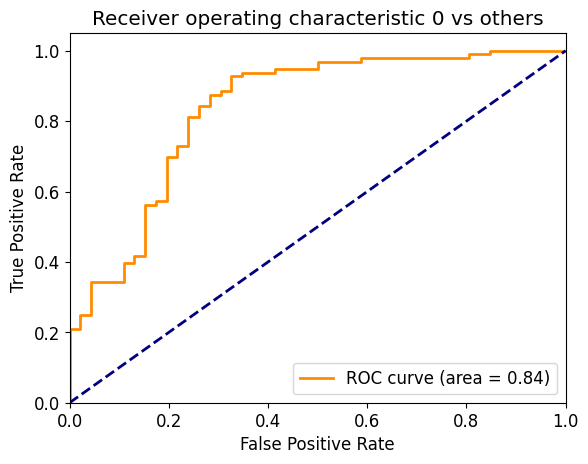

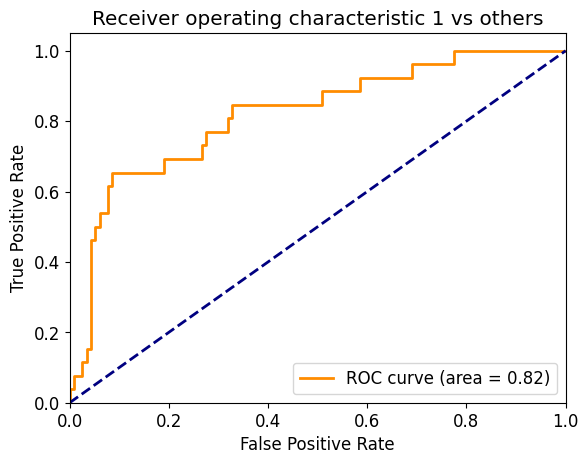

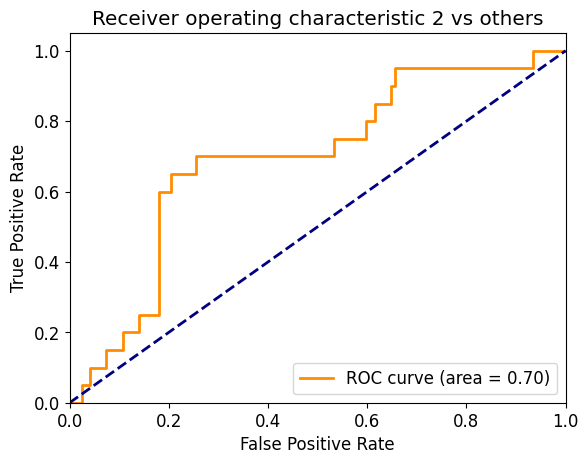

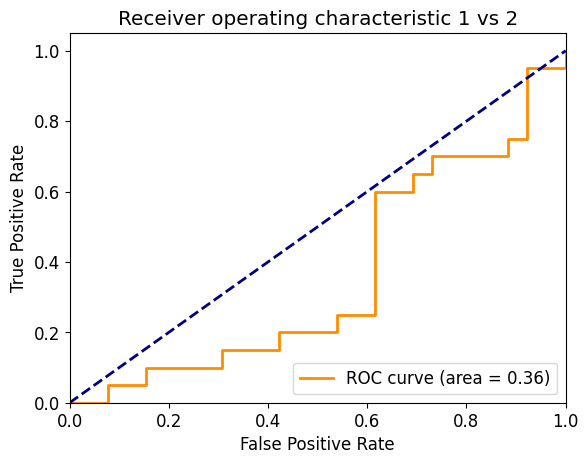

In [350]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    
    plt.savefig(x+"1-5 2класса" + name + ".png")
    plt.show()
    

    
    
    
    

plot_roc(res['true'] == 0, res[0], '0 vs others')

plot_roc(res['true'] == 1, res[1], '1 vs others')

plot_roc(res['true'] == 2, res[2], '2 vs others')

plot_roc(res[res['true'] > 0]['true'] == 2, res[res['true'] > 0][2], '1 vs 2')

In [361]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X_begin, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X_begin.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)
#with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
#    imp_out.to_excel(writer, sheet_name='SHAP_init 2класса', index=False)



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


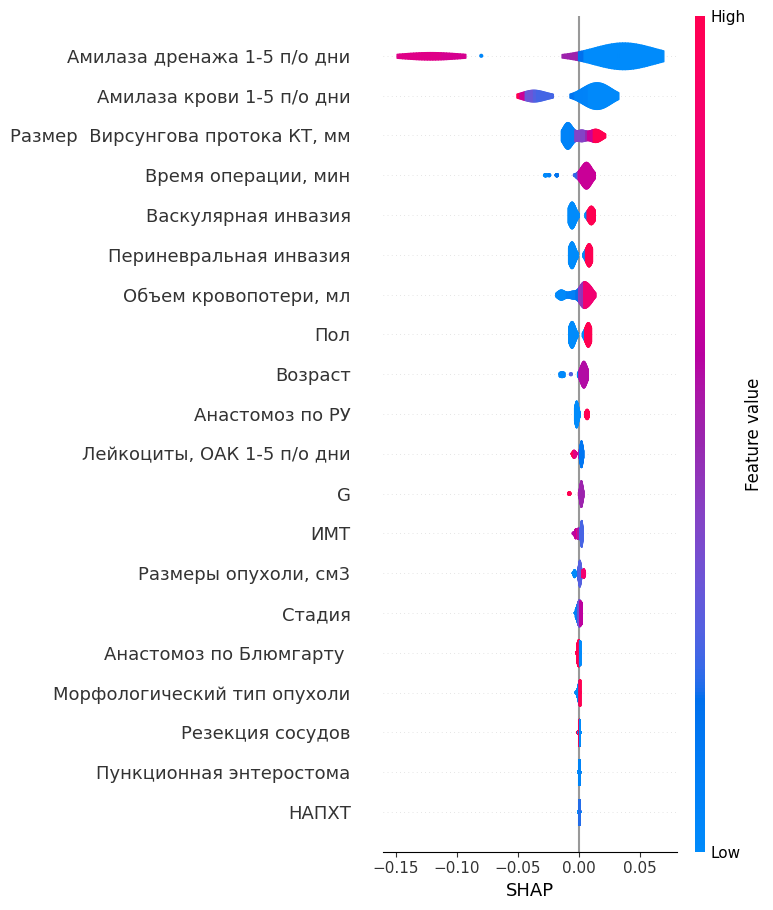

In [362]:
shap_test = shap.TreeExplainer(calc_model).shap_values(X_begin)
fig = shap.plots.violin(shap_test[0], X_begin,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_1-5 2класса_0.png")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


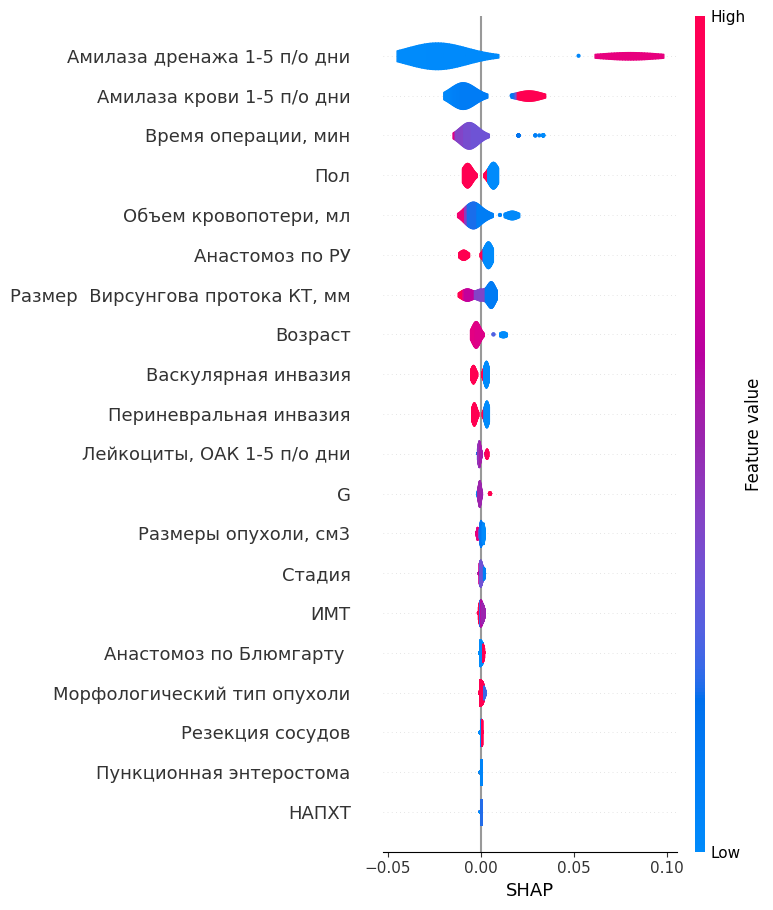

In [363]:
shap_test = shap.TreeExplainer(calc_model).shap_values(X_begin)
fig = shap.plots.violin(shap_test[1], X_begin,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_1-5 2класса_1.png")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


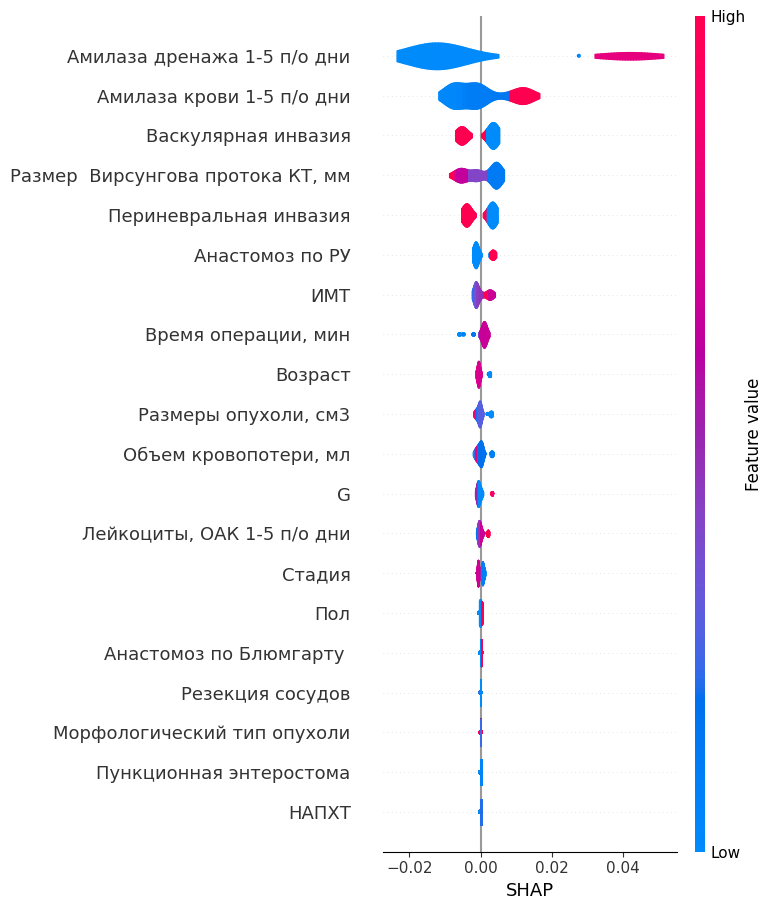

In [364]:
shap_test = shap.TreeExplainer(calc_model).shap_values(X_begin)
fig = shap.plots.violin(shap_test[2], X_begin,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_1-5 2класса_2.png")

In [ ]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X_begin, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X_begin)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)
with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
    imp_out.to_excel(writer, sheet_name='1-5 2класса', index=False)


#fig, ax = plt.subplots(figsize=(20, 20))
shap_test = shap.TreeExplainer(calc_model).shap_values(X_begin)
fig = shap.plots.violin(shap_test[1], X_begin,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_1-5 2класса_1.png")

shap_test = shap.TreeExplainer(calc_model).shap_values(X_begin)
fig = shap.plots.violin(shap_test[2], X_begin,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_1-5 2класса_2.png")

shap_test = shap.TreeExplainer(calc_model).shap_values(X_begin)
fig = shap.plots.violin(shap_test[0], X_begin,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_1-5 2класса_0.png")

## X = Все данные кроме хронологических

In [340]:
X_zero = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 1-5 п/о дни', 'Амилаза крови 10-15 п/о дни',
       'Амилаза дренажа 1-5 п/о дни', 'Амилаза дренажа 10-15 п/о дни',
      # 'Лейкоциты, ОАК 1-3 п/о дни', 
                    'Лейкоциты, ОАК 1-5 п/о дни',
       'Лейкоциты, ОАК 5-7 п/о дни', 'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_zero

y = data['Послеоперационные фистулы 2 класса']

### Random forest

In [341]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [1000], #[300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 40)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)

Best Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 13, 'n_estimators': 1000}
Best Cross-Validation Score: 0.6534446351385712
roc_auc по Шурику: 0.628818637654691
roc_auc средний: 0.6431477879481312


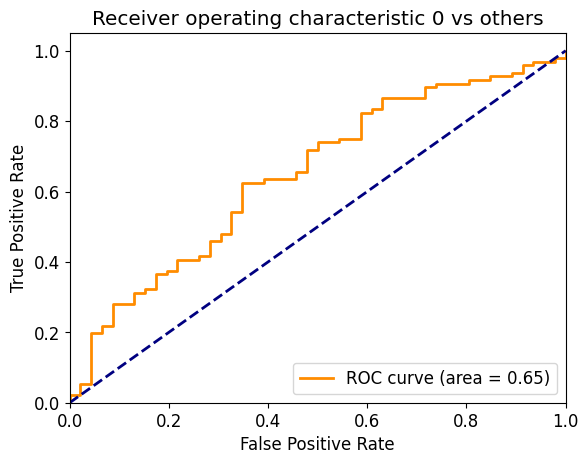

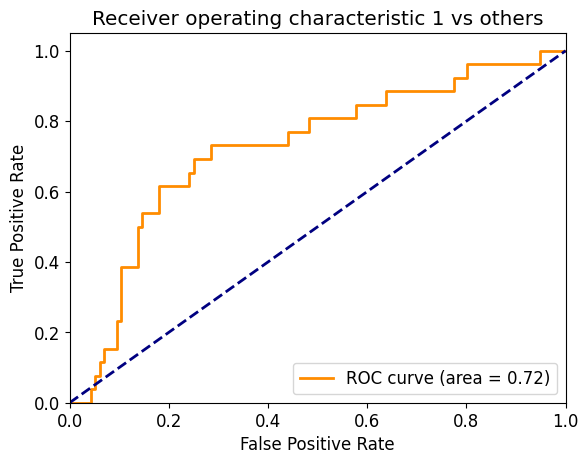

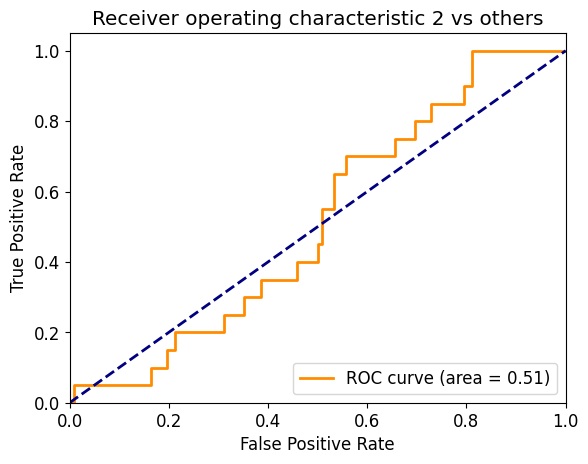

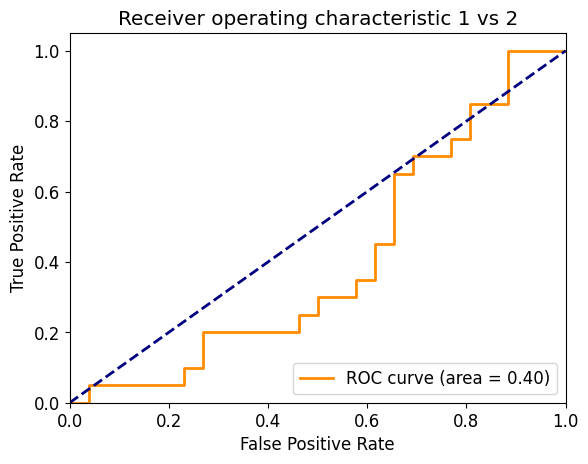

In [342]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    
    #plt.savefig(x+"tets_2d.png")

    plt.savefig(x+"init 2класса_ovo" + name + ".png")
    plt.show()
    

    
    
    
    

plot_roc(res['true'] == 0, res[0], '0 vs others')

plot_roc(res['true'] == 1, res[1], '1 vs others')

plot_roc(res['true'] == 2, res[2], '2 vs others')

plot_roc(res[res['true'] > 0]['true'] == 2, res[res['true'] > 0][2], '1 vs 2')

#fig.savefig(x+"tets_2d.png")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


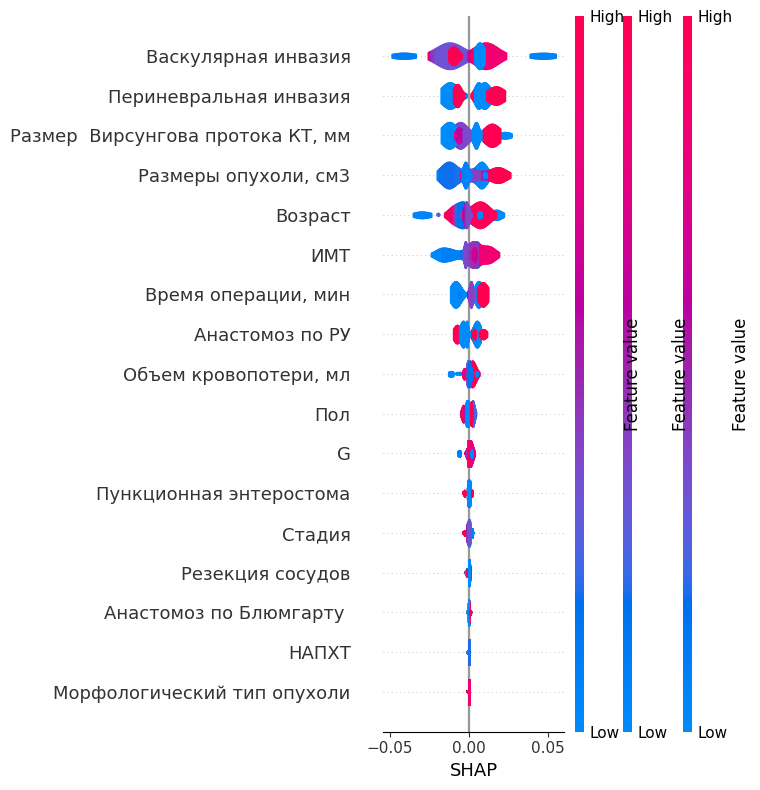

In [344]:
plt.rcParams.update({'font.size': 20})
calc_model = grid_search.best_estimator_.fit(X_zero, y)
imp =  pd.DataFrame(list(zip(calc_model.feature_importances_, X_zero.columns)))
imp.columns = ['importance', 'feat']

imp_out = imp.sort_values('importance', ascending = False)
#with pd.ExcelWriter("/home/genetics/ML/Importances.xlsx", engine='openpyxl', mode='a') as writer:
    # Write the new DataFrame to a new sheet
#    imp_out.to_excel(writer, sheet_name='SHAP_init 2класса', index=False)


#fig, ax = plt.subplots(figsize=(20, 20))
shap_test = shap.TreeExplainer(calc_model).shap_values(X_zero)
fig = shap.plots.violin(shap_test[1], X_zero,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_init 2класса_1.png")

shap_test = shap.TreeExplainer(calc_model).shap_values(X_zero)
fig = shap.plots.violin(shap_test[0], X_zero,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_init 2класса_0.png")

shap_test = shap.TreeExplainer(calc_model).shap_values(X_zero)
fig = shap.plots.violin(shap_test[2], X_zero,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_init 2класса_2.png")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


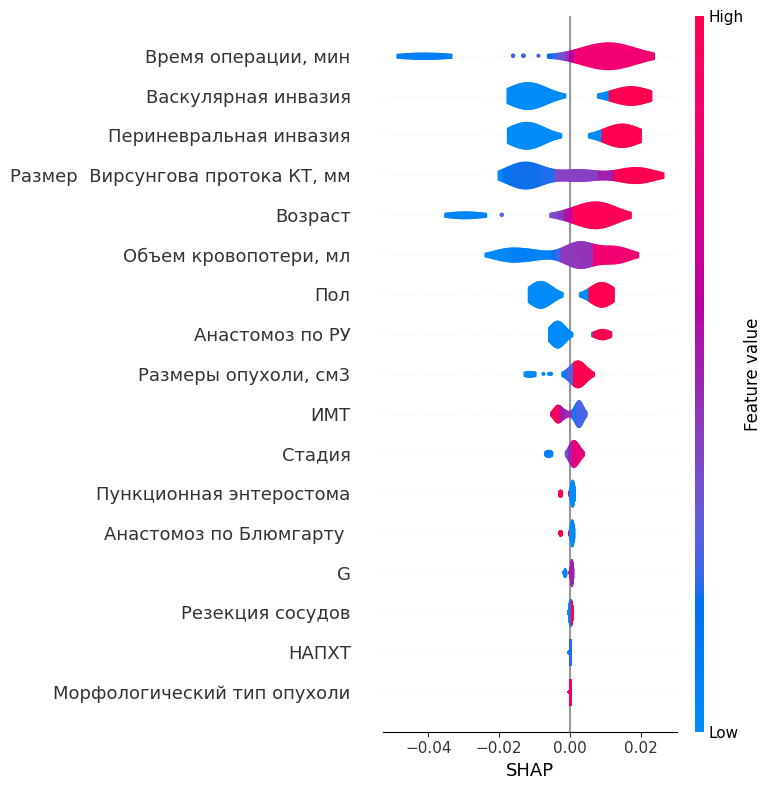

In [345]:
shap_test = shap.TreeExplainer(calc_model).shap_values(X_zero)
fig = shap.plots.violin(shap_test[0], X_zero,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_init 2класса_0.png")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


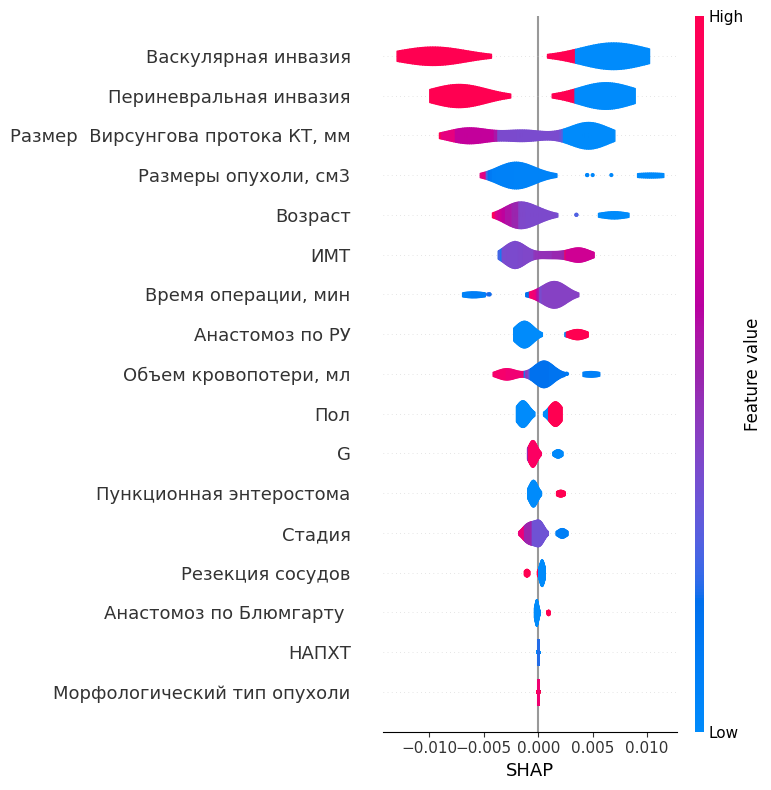

In [346]:
shap_test = shap.TreeExplainer(calc_model).shap_values(X_zero)
fig = shap.plots.violin(shap_test[2], X_zero,
                     max_display=100, show=False)

plt.xlabel('SHAP')
plt.tight_layout()
plt.savefig(x+"SHAP_init 2класса_2.png")

In [ ]:
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics_RF2.xlsx")